In [2]:
#include <iostream>
using namespace std;

# Smart Pointers in C++

Pointers are used for accessing the resources which are external to the program – like heap memory. So, for accessing the heap memory (if anything is created inside heap memory), pointers are used. When accessing any external resource we just use a copy of the resource. If we make any changes to it, we just change it in the copied version. But, if we use a pointer to the resource, we’ll be able to change the original resource.

## Problems with Normal Pointers

Some Issues with normal pointers in C++ are as follows:

1. Memory Leaks: This occurs when memory is repeatedly allocated by a program but never freed. This leads to excessive memory consumption and eventually leads to a system crash. 
2. Dangling Pointers: A dangling pointer is a pointer that occurs at the time when the object is de-allocated from memory without modifying the value of the pointer.
3. Wild Pointers: Wild pointers are pointers that are declared and allocated memory but the pointer is never initialized to point to any valid object or address.
4. Data Inconsistency: Data inconsistency occurs when some data is stored in memory but is not updated in a consistent manner.
5. Buffer Overflow: When a pointer is used to write data to a memory address that is outside of the allocated memory block. This leads to the corruption of data which can be exploited by malicious attackers.

## Smart Pointers

Languages Java, C# has Garbage Collection Mechanisms to smartly deallocate unused memory to be used again. The programmer doesn’t have to worry about any memory leaks.

C++ comes up with its own mechanism that’s Smart Pointer. When the object is destroyed it frees the memory as well. So, we don’t need to delete it as Smart Pointer does will handle it.

A Smart Pointer is a wrapper class over a pointer with an operator like * and -> overloaded. The objects of the smart pointer class look like normal pointers. But, unlike Normal Pointers it can deallocate and free destroyed object memory.

The idea is to take a class with a pointer, destructor, and overloaded operators like * and ->. Since the destructor is automatically called when an object goes out of scope, the dynamically allocated memory would automatically be deleted (or the reference count can be decremented).

Example: [LINK](../volansys_cpp_advanced/14_Smart_Pointers/demo_smart_pointers.cpp)

Note: Above Example only works for int. So, we’ll have to create Smart Pointer for every object? No, there’s a solution, Template. In the code below as you can see T can be of any type.

It can be demonstrated in this Example: [LINK](../volansys_cpp_advanced/14_Smart_Pointers/template_smart_pointers.cpp)

## Difference Between Pointers and Smart Pointers

|                                                                                      Pointer                                                                                     |                                                             Smart Pointer                                                            |
|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:------------------------------------------------------------------------------------------------------------------------------------:|
| A pointer is a variable that maintains a memory address as well as data type information about that memory location. A pointer is a variable that points to something in memory. | It’s a pointer-wrapping stack-allocated object. Smart pointers, in plain terms, are classes that wrap a pointer, or scoped pointers. |
|                                                           It is not destroyed in any form when it goes out of its scope                                                          |                                           It destroys itself when it goes out of its scope                                           |
|                                                      Pointers are not so efficient as they don’t support any other feature.                                                      |                      Smart pointers are more efficient as they have an additional feature of memory management.                      |
|                                                                        They are very labor-centric/manual.                                                                       |                                             They are automatic/pre-programmed in nature.                                             |

Note: Smart pointers are also useful in the management of resources, such as file handles or network sockets.

## Types of Smart Pointers

Smart pointers in C++ are objects that act like pointers but provide additional features, such as automatic memory management and improved safety. They are part of the C++ Standard Template Library (STL) and are defined in the ```<memory>``` header.


C++ libraries provide implementations of smart pointers in the following types:

- auto_ptr
- unique_ptr
- shared_ptr
- weak_ptr

1. auto_ptr: Using auto_ptr, you can manage objects obtained from new expressions and delete them when auto_ptr itself is destroyed. When an object is described through auto_ptr it stores a pointer to a single allocated object.

Note: This class template is deprecated as of C++11. unique_ptr is a new facility with a similar functionality, but with improved security.

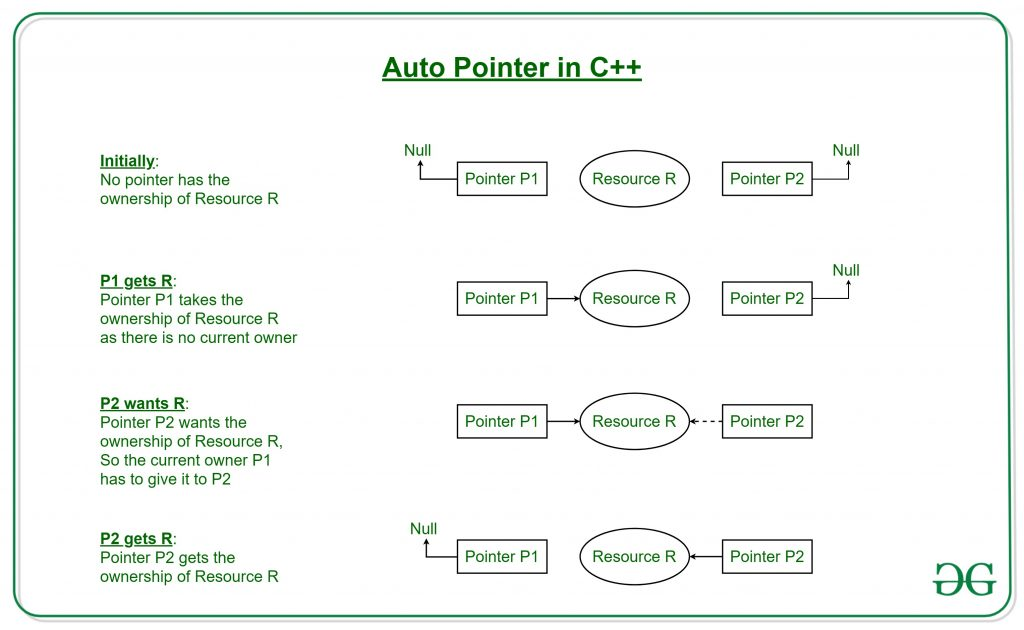

2. unique_ptr
unique_ptr stores one pointer only. We can assign a different object by removing the current object from the pointer. 

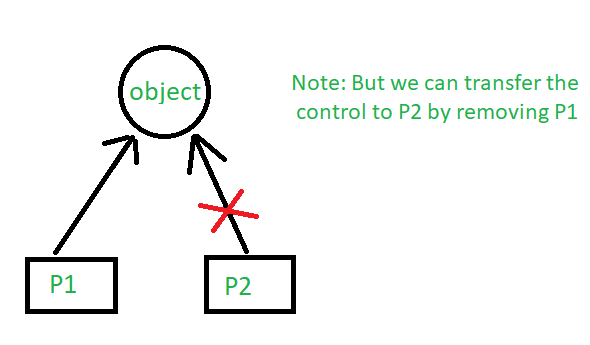

Example of unique_ptr: [LINK](../volansys_cpp_advanced/14_Smart_Pointers/unique_ptr.cpp)

3. shared_ptr:
By using shared_ptr more than one pointer can point to this one object at a time and it’ll maintain a Reference Counter using the use_count() method. 
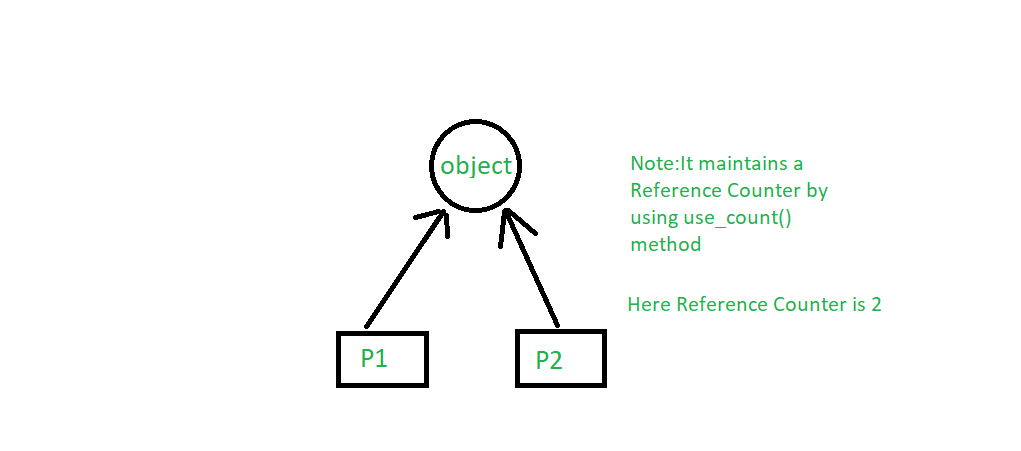

Example of Shared_ptr: [LINK](../volansys_cpp_advanced/14_Smart_Pointers/shared_ptr.cpp)


4. weak_ptr 
Weak_ptr is a smart pointer that holds a non-owning reference to an object. It’s much more similar to shared_ptr except it’ll not maintain a Reference Counter. In this case, a pointer will not have a stronghold on the object. The reason is if suppose pointers are holding the object and requesting for other objects then they may form a Deadlock. 

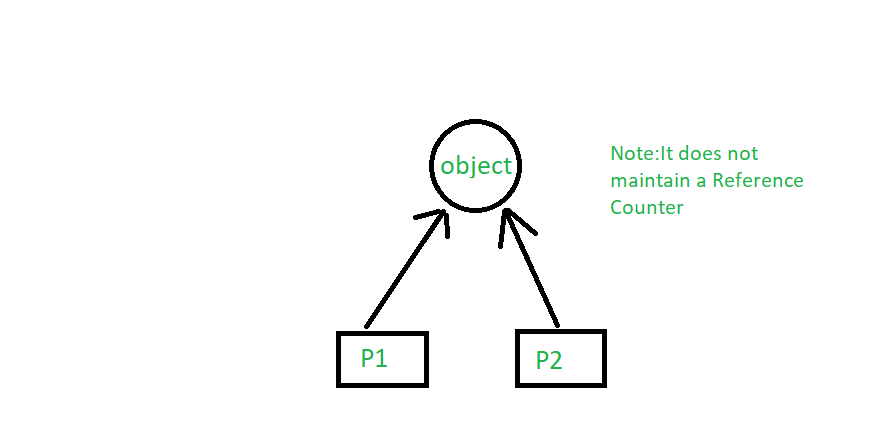

Example of weak_ptr: [LINK](../volansys_cpp_advanced/14_Smart_Pointers/weak_ptr.cpp)






# RAII in C++

RAII (Resource Acquisition Is Initialization) is C++ technique which control the life cycle of resource. It is a class variant and is tied to object life time.

It encapsulates several resources into class where resource allocation is done by constructor during object creation and resource deallocation is done by destructor during object destruction.

Resource is guaranteed to be held till the object is alive.

Smart pointer is an abstract data type by using which we can make a normal pointer in such way that it can be used as memory management like file handling, network sockets etc., also it can do many things like automatic destruction, reference counting etc.

Smart pointer in C++, can be implemented as template class, which is overloaded with * and -> operator. auto_ptr, shared_ptr, unique_ptr and weak_ptr are the forms of smart pointer can be implemented by C++ libraries.

Another Example of Smart Pointers: [LINK](../volansys_cpp_advanced/14_Smart_Pointers/demo_smart_ptrs2.cpp)

# What is a C++ unique pointer and how is it used?

## Introduction
Unique pointers are smart pointers that help us in memory management. Unique pointers guarantee they delete their object if they are destructed, therefore, one less hassle for programmers. They follow “Resource Acquisition Is Initialization” (RAII) rule.

## Unique pointer
A unique pointer is defined as

```std::unique_ptr<int> p(new int); // p is allocated a new int on```

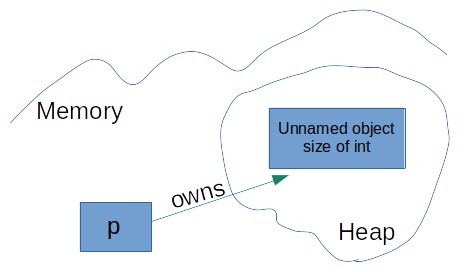

If the unique pointer is destructed, the allocated object on the heap is destructed too

A unique pointer can also be created with ```std::make_unique```

## Ownership
A unique pointer is a 1-to-1 relationship between a pointer (p) and its allocated object on the heap (new int).

```
unique_ptr<int> p(new int);
// p <-------->  object
```

p owns the object and the object has only one owner, p. So when programming, we can think of them as one entity.

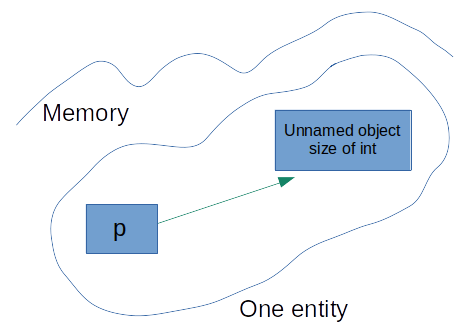

A unique pointer cannot be copied or passed by value. However, the ownership of its object can be transferred.

A unique pointer can be empty too

```unique_ptr<int> p; // empty pointer, contains null pointer```




## Operations
A unique pointer supports operations below


In [4]:
struct Person{
  Person(string n):Name(n){}
  string Name;
};

auto p = make_unique<Person>("Rose"); // create unique pointer
auto b = *p; // dereference pointer
p->Name = "Jack"; // access class members

//There is a raw pointer inside a unique pointer that can be accessed:
auto r = p.get(); // get the raw pointer
//Use the above raw pointer only for calculations and do not delete it as it is managed by a unique pointer.

In [5]:
//The pointer can be reset to a new object
auto q = make_unique<int>(); // q created with an int object on the heap
q.reset(new int()); // The previouse object deleted, a new one is created.

Only one unique pointer owns the object on the heap:
```
auto q = make_unique<int>(); // q associate to a newly created object on the heap
auto p = q; // Error: the object belongs to q and cannot be shared.
```

However, the ownership of the object can be transfered via std::move():

```
auto q = make_unique<int>(); // q created with an int object on the heap
auto p = move(q); // p owns the q's object, q lost it (null pointer).
```
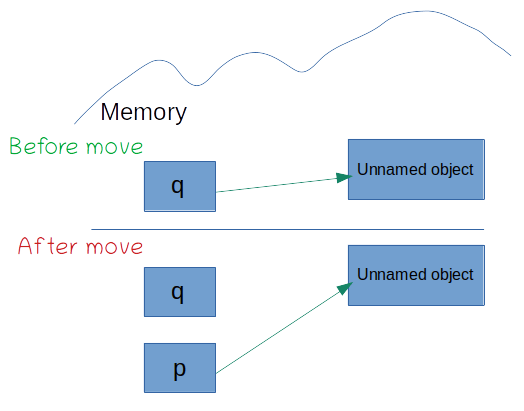


```std::swap``` works with unique pointers
```
auto p = make_unique<int>(); 
auto q = make_unique<int>(); 
swap(p,q); // p points to q's object and vice versa.
```

A unique pointer can be checked if it is associated with an object
```
unique_ptr<int> a; // a created but is empty (null pointer)
if (a) // (bool) a returns false as it is not associated.
  cout<<*a; // This is not run.
```

## Pass to a function

The function below takes the ownership of a unique pointer. To pass the pointer std::move() must be used:
Example of passing a unique_ptr: [LINK](../volansys_cpp_advanced/14_Smart_Pointers/passing_unique_ptr_to_func.cpp)

## Return from function

A function can return a unique pointer. Consequently, it gives up the ownership of the pointer:

Example of return from function: [LINK](../volansys_cpp_advanced/14_Smart_Pointers/return_from_func_unique_ptr.cpp)

## Pass to observer function

If the function only works with the pointer’s object and doesn’t care about the ownership, we can pass the unique pointer by a reference or raw pointer. If null pointer should be handled, we pass it by a raw pointer:

Example: [LINK](../volansys_cpp_advanced/14_Smart_Pointers/unique_ptr_pass_observer_func.cpp)



## Class member: unique pointer vs raw pointer vs reference

If we design our program based on smart pointers, we can assume the below rules for a class member:

- Unique pointer member: the class is the owner of the pointer’s object.
- Raw pointer member: the class is an observer and not responsible for deleting the pointer’s object. It is deleted by a smart pointer outside of this class. The pointer can be null.
- Reference member: it is guaranteed that the reference contains valid data while the class object is alive.

## Performance
Accessing unique pointers is as fast as raw pointers. The class of the unique pointer contains only a raw pointer as the data member, so, the size of a unique pointer is the same as a raw pointer. All in all, unique pointers can safely replace raw pointers in high-performance calculations.


Factory Example: [LINK](../volansys_cpp_advanced/14_Smart_Pointers/unique_ptr2.cpp)

# What is a C++ shared pointer and how is it used?

## Introduction
Shared pointers are smart pointers that ameliorate working with dynamically allocated objects. They are invented to avoid memory leaks that raw pointers may bring

## Definition
Consider class A
```
struct A{
    int M;
    A(int m):M(m){}
};
```

A shared pointer, pointing to an object of A is defined as


```shared_ptr<A> sp1 (new A{5});```

or preferably

```auto sp1 = make_shared<A>(5);```

where the new object, new A{}, is created on the heap and sp1 points to it. The object is called the managed object. sp1 owns the object.

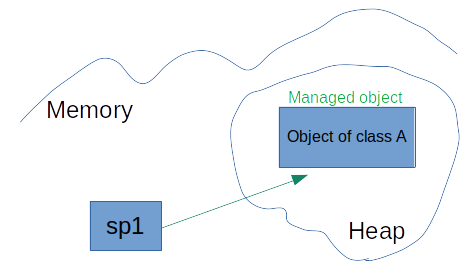

sp1 can share its object with another one

```shared_ptr<A> sp2 = sp1; ```

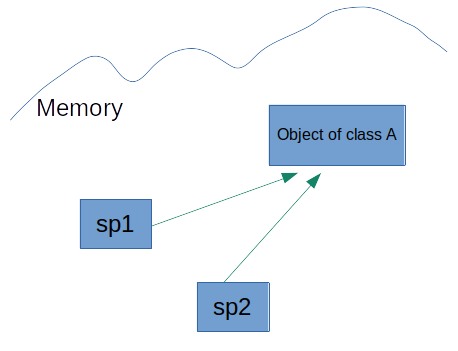

So the managed object is not re-created or copied, it is pointed by another pointer.

We can share the object with as many shared pointers as we like

```auto sp3 = sp1;```

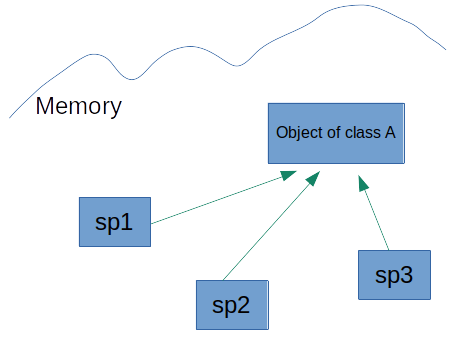

A shared pointer can be empty

```shared_ptr<A> sp4; // has no managed object.```

We can set it later

```sp4 = sp3;```

## Operations

Let’s consider class A again

```
struct A{
    int M;
    A(int m):M(m){}
};
```

A shared pointer supports usual pointer dereferencing

```
(*sp1).M = 1; // dereference the pointer i.e. get the managed object

sp1-> M = 2; // same as above
```

The shared pointer is, in fact, a class which has a raw pointer pointing to the managed object. This pointer is called stored pointer. We can access it

```
auto p  = sp1.get();

cout<< p <<endl; // 0x2070ec0 : memory address of the managed object
```
Use the stored pointer for accessing and working with the managed object not for modifying its ownership.

A shared pointer, in addition to the stored pointer, has a second pointer which points to a control block. The control block has a reference counter that memorizes the number of shared pointers pointing to the same object.

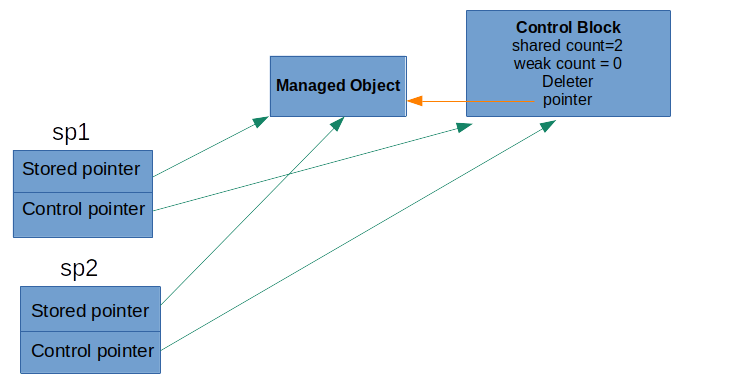

At any scope, we can check how many shared pointers point to a managed object

```
auto sp1 = make_shared<A>(5);
cout<< sp1.use_count()<<endl; // 1 : only sp1 points to the object

shared_ptr<A> sp2 = sp1; 

cout<< sp1.use_count()<<endl; // 2 : sp1 and sp2 both point to the object
cout<< sp2.use_count()<<endl; // 2 : both sp1 and sp2 know use counts.
```

## Destruction

If a shared pointer is destructed, the control unit decrements the reference counter:

```
auto sp1 = make_shared<A>(5);

{
    shared_ptr<A> sp2 = sp1;
    cout<< sp1.use_count()<<endl; // 2
}
// sp2 is destructed 
cout<< sp1.use_count()<<endl; // 1
```
The managed object will be deleted when the last shared pointer is deleted:

```
{
    auto sp1 = make_shared<A>(5);
    {
        shared_ptr<A> sp2 = sp1;
        cout<< sp1.use_count()<<endl; // 2
    }
    // sp2 is destructed 
    cout<< sp1.use_count()<<endl; // 1
}
// sp1 is destructed so is the managed object.
```

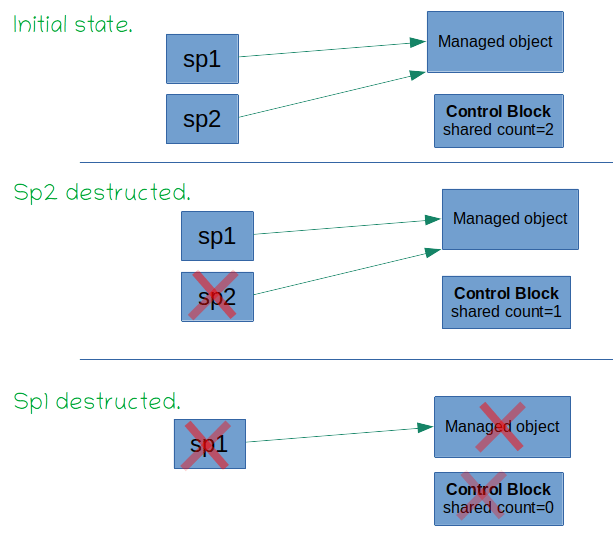

The counter is decremented also if a pointer is detached

```
auto sp1 = make_shared<A>(5);
auto sp2 = sp1;
auto sp3 = sp1;

cout<< sp1.use_count()<<endl; // 3

sp2.reset(); // sp2 is detached and empty.

sp3 = make_shared<A>(4); // sp3 is reassigned another object.

cout<< sp1.use_count()<<endl; // 1
```

## Pass to function

If the function wants ownership of a shared pointer, we can pass it by value as: [LINK](../volansys_cpp_advanced/14_Smart_Pointers/shared_ptr_pass_to_func.cpp)

## Get from a function

A function may return a shared pointer by value: [LINK](../volansys_cpp_advanced/14_Smart_Pointers/shared_ptr_return.cpp)

## Class Member

A shared pointer can be a class member: [LINK](../volansys_cpp_advanced/14_Smart_Pointers/shared_ptr_class_mem.cpp)

## Observer function/class
If a function wants just to access the managed object and it doesn’t care about deleting or extending the lifetime of it, we can pass the shared pointer as a raw pointer. A class with similar characteristics can have a raw pointer member.

## Performance

Dereferencing a shared pointer has the same performance as a raw pointer (depending on the compiler).

A shared pointer needs two raw pointers. A set of shared pointers which have the same managed object need a control unit. Therefore, the memory that a shared pointer takes is more than a raw pointer and a unique pointer. So, if a vector of a million pointers should be created, probably unique pointers are a better choice.

Creating/deleting/resetting a shared pointer involves some logics: updating the reference counter, checking if it is the first/last pointer and so on. Therefore, we get the better performance to avoid these actions within loops which iterate numerous times (like million times).

## Shared pointer, unique pointer or raw pointer

If the program is designed based on smart pointers, then raw pointers are used only to access the managed objects of smart pointers. We must not delete a raw pointer at all.

If an object needs only one owner through the program, and we can imagine the object and the pointer as one entity, then the unique pointer is the way to go. For the high-performance section of the code, unique pointers are better than shared pointers (see the previous section).

Shared pointers can help to code faster in sections of the code that involve high-level programming where we don’t need to think about performance, ownership and lifetime of objects.

# What is a C++ weak pointer and where is it used?

## Introduction
A weak pointer is a smart pointer that does not take ownership of an object but act as an observer. In other words, it does not participate in reference counting to delete an object or extend its lifetime. Weak pointers are mainly used to break the circular dependency that shared pointers create.

## Definition
Consider the example class below
```
struct Person{
    string Name;
    Person(string n):Name(n){}
};
```

A weak pointer working with an object of Person is defined as

```std::weak_ptr<Person> wp;```

A weak pointer is used to observe the object of a shared pointer

```
auto teacher = make_shared<Person>("Jack");

wp = teacher; // wp watches the managed object of teacher
```

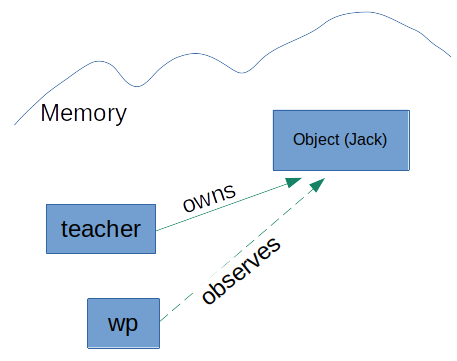

Somewhere else that we are not sure if the object is still there or not:

```
if (auto tempSharedPointer = wp.lock()){ // if Jack there
    cout<< tempSharedPointer-> Name;
} else
{
    cout<< "The object is not there.";
}
```

In the above example lock() returns a temporary shared pointer pointing to the managed object, Jack.


Example of Weak_ptr: [LINK](../volansys_cpp_advanced/14_Smart_Pointers/weak_ptr2.cpp)

Explanation of above code: 

An object of shared pointers has a control block, which counts the number of weak and shared pointers. When the shared counter reaches zero the object is deleted, but the control block is alive until the weak counter reaches zero as well. The code can be sketched as the image below

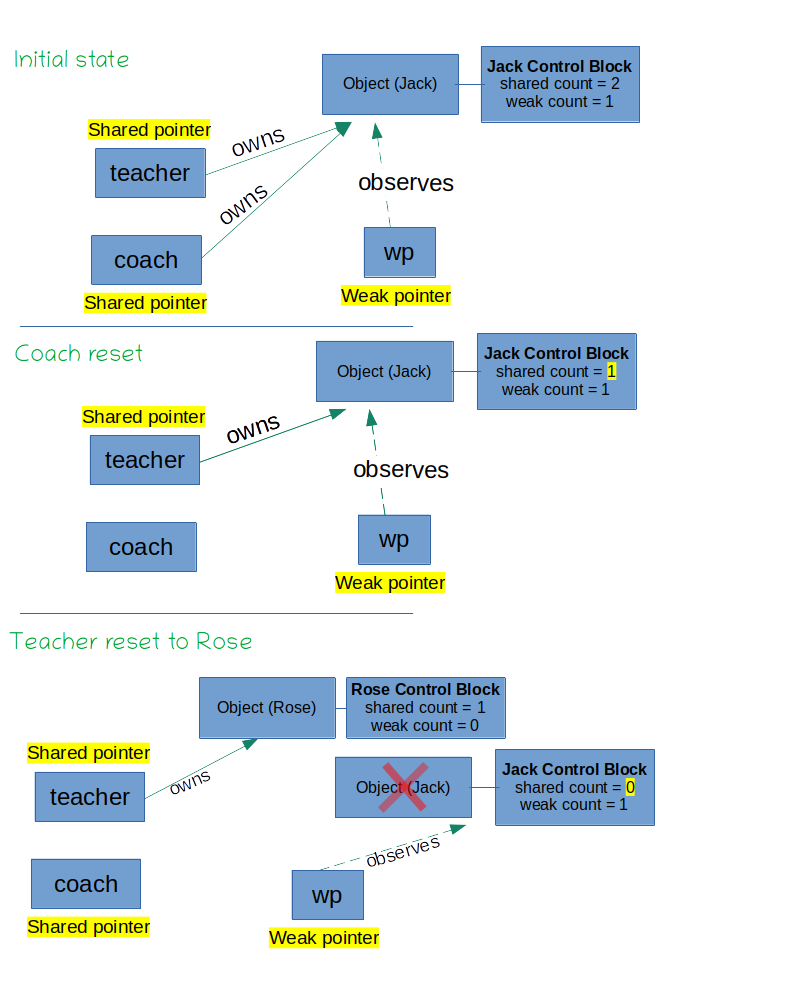


## Why we need weak pointers?

The main reason weak pointers are invented is to break circular dependency of shared pointers. Otherwise, they cannot delete their objects

**Example of circular dependency**: 
```
struct Person;

struct Team{
    shared_ptr<Person> goalKeeper;
    ~Team(){cout<<"Team destructed.";}
};
struct Person{
    shared_ptr<Team> team;
    ~Person(){cout<<"Person destructed.";}
};

int main(){
    
    
    auto Barca = make_shared<Team>();
    auto Valdes = make_shared<Person>();
    
    Barca->goalKeeper = Valdes;
    Valdes->team = Barca;
    
    return 0;

}
```

In the example above, the destructors are not called and we have a memory leak. The managed object of a shared pointer is deleted when the reference count reaches zero. If Barca goes out of scope, it is not deleted since the managed object is still pointed by Valdes.team. When Valdes goes out of scope, its managed object is not deleted either as it is pointed by Barca.goalKeeper.

This case can be solved with a weak pointer:

```
struct Person;

struct Team{
    shared_ptr<Person> goalKeeper;
    ~Team(){cout<<"Team destructed.";}
};
struct Person{
    weak_ptr<Team> team; // This line is changed.
    ~Person(){cout<<"Person destructed.";}
};

int main(){
    
    
    auto Barca = make_shared<Team>();
    auto Valdes = make_shared<Person>();
    
    Barca->goalKeeper = Valdes;
    Valdes->team = Barca;
    
    return 0;

}
```

Both destructors are called. When Barca goes out of scope, it will be destructed as it is pointed by a weak pointer (non-owner). Valdes is destructed easily as it is not pointed by anything.

One may say what if Valdes goes out of scope first? its object is not deleted but its reference count changes to 1. When Barca goes out of scope, it destructs its managed object which destructs the goalKeeper i.e. Valdes.

# Custom Deleter in C++

When a smart pointer of any user-defined type is destroyed, the destructor of the class is invoked giving us the ability to explicitly inspect and modify the delete process.

But that is not the case with smart pointers of a primitive type. (primitive type like int, float, char)

We can write a specific type of custom delete function that will be called automatically when any smart pointer of that particular type is deleted.

## How to Create a Custom Deleter in C++?

The general syntax to create a custom deleter is:
```
void <function_name> (<type>* <obj_name>){
    //code
}
```

Custom delete function accepts a pointer object of the type same type as the smart pointer object.

Note: Defining a custom deleter is not enough, we have to connect it with the smart pointer object.

To associate a custom deleter with a smart pointer, we have to provide the name of the function to the object during its declaration.

```shared_ptr<type> <ptr_name> { pointer_obj, <function_name> };```

## CUSTOM DELETERS AS LAMBDA EXPRESSION

We can also create a custom deleter as an lambda expression in C++.

The general syntax to create a Custom deleter as lambda expression is:

```
shared_ptr<type> <ptr_name> { pointer_obj, [](type *<obj_name>){
        //code
    }
};

```

Note: We have used shared_ptr for the demonstration. We can create custom deleters for any type of smart pointers.

C++ Example using Custom Deleters : [LINK](../volansys_cpp_advanced/14_Smart_Pointers/custom_deleter.cpp)

Although Custom deleters rarely come in handy, it makes smart pointers more powerful



Complicated Example of Custom deleters: [LINK](../volansys_cpp_advanced/14_Smart_Pointers/custom_deleter2.cpp)


